In [3]:
import cloudpickle
import numpy as np
%matplotlib inline

In [11]:
disease_db=cloudpickle.load(open("pickles/disease_db.pkl", "rb" ) )

diag = cloudpickle.load(open("pickles/doctortext_labels.pkl", "rb" ) )
antidiag = cloudpickle.load(open("pickles/askertext_labels.pkl", "rb" ) )
y_1=np.asarray(diag.todense()).squeeze() 
y_2=np.asarray(antidiag.todense()).squeeze() 
y_t = 1*((y_1+y_2)>0)

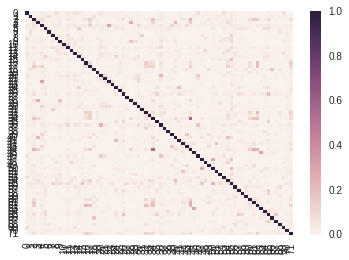

In [12]:
import seaborn as sns
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(y_t.T)
sns.heatmap(sim)

In [13]:
for i in range(sim.shape[0]):
    for j in range(i+1,sim.shape[0]):
        if(sim[i,j]>0.1):
            print('%s,%s,%s' % (disease_db[i]['name'], disease_db[j]['name'], sim[i,j]))

aids,vaginitis,0.134542051778
aids,chlamydia,0.184533504092
aids,gonorrhea,0.233745579068
aids,syphilis,0.163660771034
aids,trichomoniasis,0.13206715801
adenomyosis,bleeding disorders,0.253512756287
adenomyosis,chlamydia,0.108469623328
adenomyosis,pid,0.220304354331
adenomyosis,gonorrhea,0.137262394619
cancer,vaginitis,0.123624912174
cancer,breast cancer,0.306333076803
cancer,family history,0.111579733866
cancer,ebv infection,0.109114959115
allergies,asthma,0.14297271104
amenorrhea,breastfeeding,0.138923937039
amenorrhea,pregnancy,0.113836081084
anemia,bleeding disorders,0.164495473314
appendicitis,inflammatory bowel disease,0.107566665049
asthma,bronchitis,0.109901458018
back pain,pregnancy,0.18070728748
bacterial vaginosis,vaginitis,0.101212753234
bacterial vaginosis,candidiasis,0.127283609779
bacterial vaginosis,trichomoniasis,0.212643244284
bacterial vaginosis,yeast infection,0.141051858286
vaginitis,candidiasis,0.117382986429
vaginitis,thrush,0.132752283543
vaginitis,chlamydia,0.1

In [14]:
with open("pickles/disease_similarity.pkl", 'wb') as handle:
    cloudpickle.dump(sim, handle)